In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-to-canada/canadian_immegration_data.csv
/kaggle/input/australia-immigration-data-19802008/Australia immigration data.xlsx
/kaggle/input/australia-immigration-data/Australia data.csv


## Read data

In [2]:
ca = pd.read_csv('/kaggle/input/immigration-to-canada/canadian_immegration_data.csv')

au = pd.read_csv('/kaggle/input/australia-immigration-data/Australia data.csv')

## Inspect data

In [3]:
ca.select_dtypes('number').columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [4]:
ca.select_dtypes('object').describe().T

,count,unique,top,freq
Country,195,195,Afghanistan,1
Continent,195,6,Africa,54
Region,195,22,Western Asia,18
DevName,195,2,Developing regions,147


In [5]:
au.select_dtypes('number').columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008'],
      dtype='object')

In [6]:
au.select_dtypes('object').describe().T

,count,unique,top,freq
OdName,222,222,Afghanistan,1
CODE,222,221,VGB,2
AreaName,222,6,Africa,56
RegName,222,22,Caribbean,23
DevName,222,2,Developing regions,172


## Rename columns

In [7]:
au = au.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'})

ca.columns = ca.columns.str.lower()
au.columns = au.columns.str.lower()

ca_num_col = ca.select_dtypes('number').columns.drop('total')
ca_obj_col = ca.select_dtypes('object').columns

au_num_col = au.select_dtypes('number').columns
au_obj_col = au.select_dtypes('object').columns.drop('code')

## Reshape Data Frames from Wide to Long Format

In [8]:
ca_mlt = ca.melt(id_vars=ca_obj_col, value_vars=ca_num_col).rename(columns={'variable':'year', 'value':'number'})
ca_mlt.name = 'ca'

au_mlt = au.melt(id_vars=au_obj_col, value_vars=au_num_col).rename(columns={'variable':'year', 'value':'number'})
au_mlt.name = 'au'

## Looping Through Variable Columns and Creating Plots for Each

### Canada

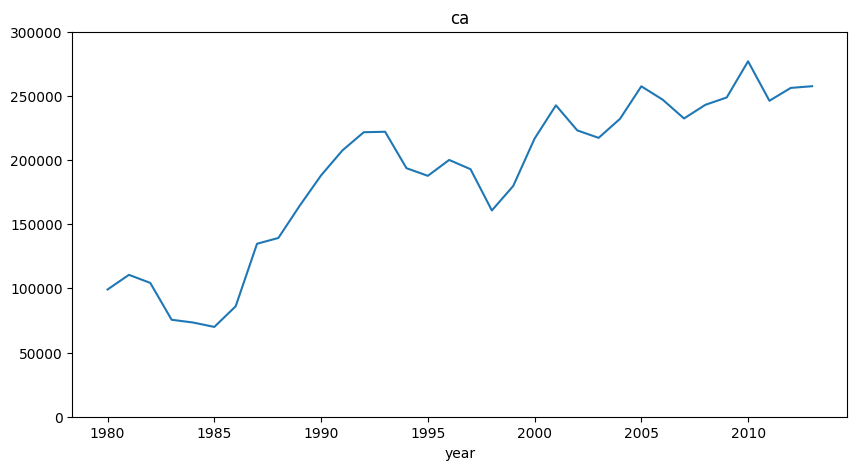

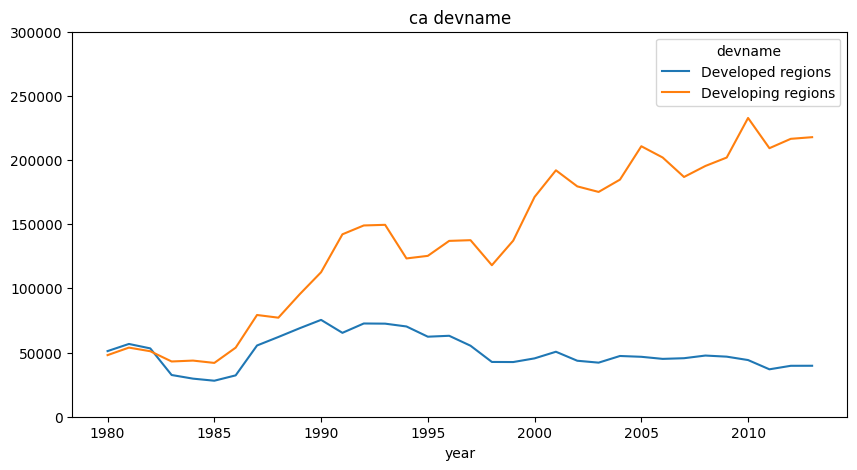

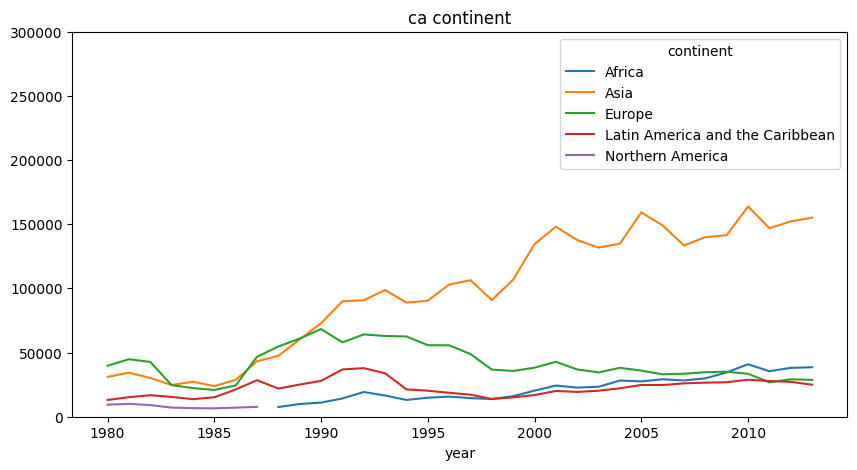

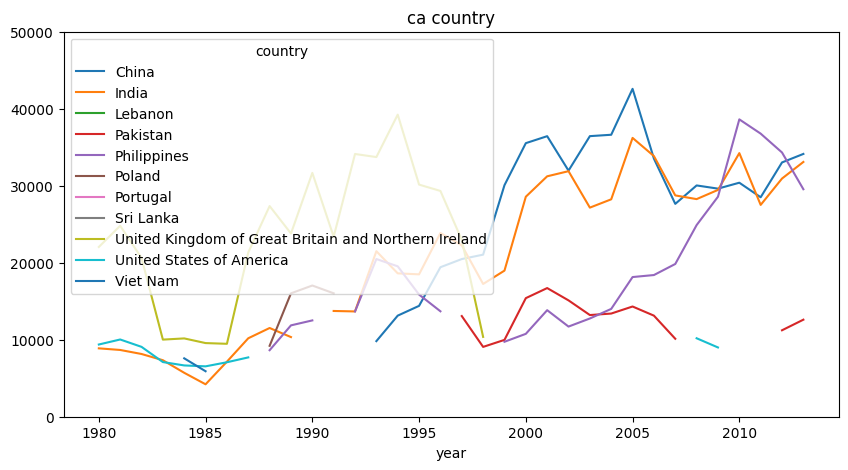

In [9]:
for df in [ca_mlt]:
    df.groupby(['year'])['number'].sum().plot(figsize=(10,5), title=df.name, ylim=(0, 300000))
    for var in ['devname', 'continent','country']:
        df_grp = df.groupby(['year', var])['number'].sum() \
        .groupby(level=0, group_keys=False).nlargest(4).reset_index() \
        .pivot(index='year', columns=var, values='number')
        if var in ['devname', 'continent']:
            df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 300000))
        #elif var in ['region']:
        #    df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 100000))
        else:
            df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 50000))

* From the 1980s to the 2010s, Canadian immigration surged from 100k to 300k.

* Immigration trends diverged over time: developing countries surged, while developed countries declined steadily. By the 2010s, immigration from developing countries, primarily from Asia, surged to about five times that of developed countries.

* Before 2000, the UK contributed around 20k immigrants, while post-2010, China, the Philippines, and India collectively contributed 30-40k immigrants each.

### Australia

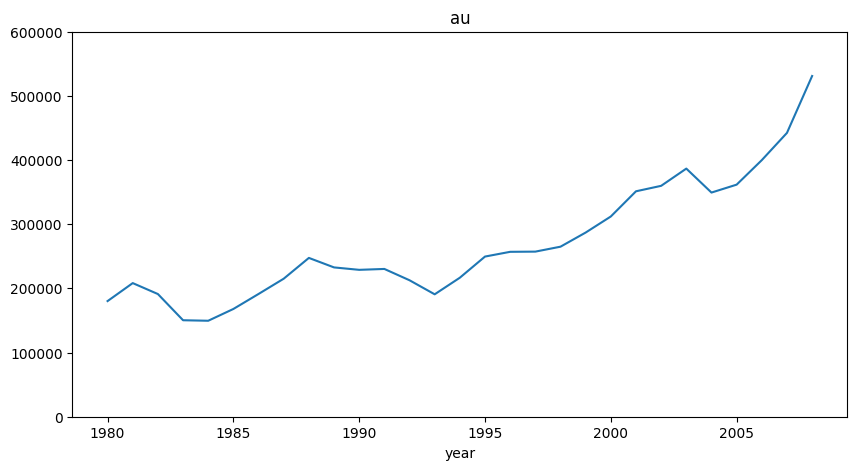

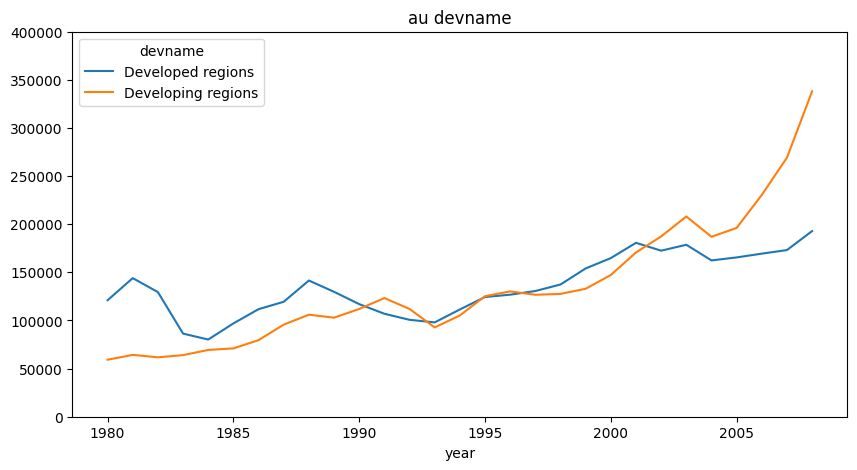

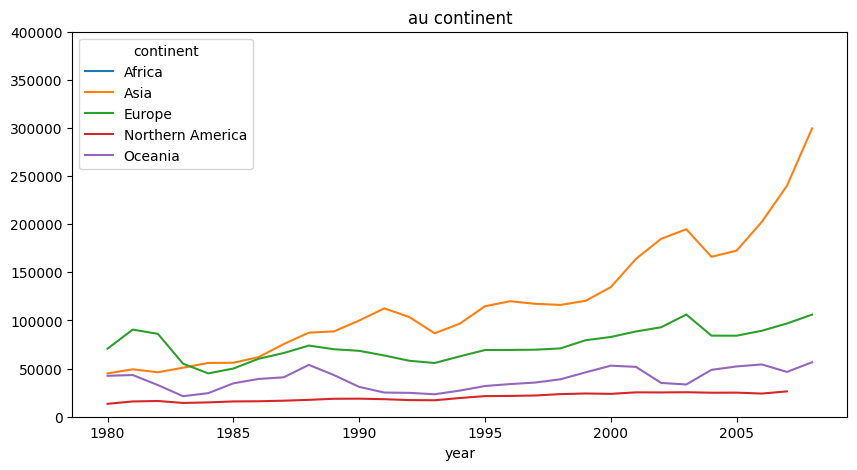

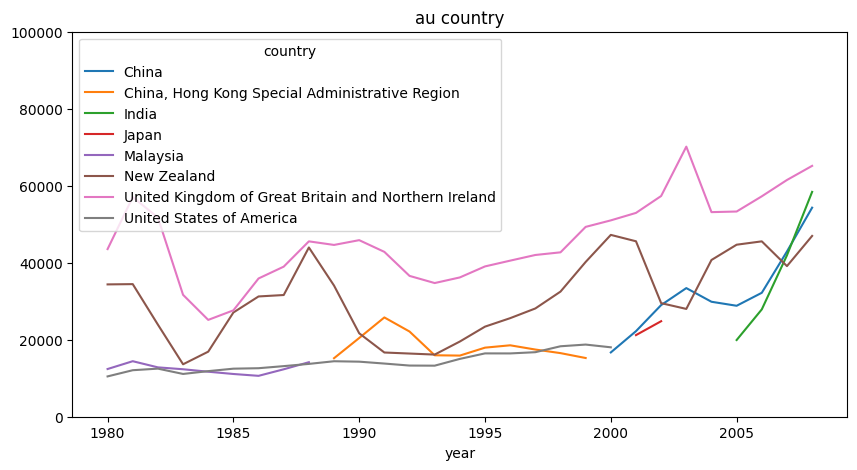

In [10]:
for df in [au_mlt]:
    df.groupby(['year'])['number'].sum().plot(figsize=(10,5), title=df.name, ylim=(0, 600000))
    for var in ['devname', 'continent','country']:
        df_grp = df.groupby(['year', var])['number'].sum() \
        .groupby(level=0, group_keys=False).nlargest(4).reset_index() \
        .pivot(index='year', columns=var, values='number')
        if var in ['devname', 'continent']:
            df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 400000))
        elif var in ['region']:
            df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 150000))
        else:
            df_grp.plot(figsize=(10,5), title=df.name+' '+var, ylim=(0, 100000))

* Immigration to Australia experienced a remarkable surge, expanding from 200k to 600k between 1980 and 2010.

* Immigrants from developed countries made a substantial contribution, ranging from 150k to 200k annually.

* Apart from Asia, Europe and Oceania also have considerable weights

## Taking a Closer Look at the Countries Across Continents

### Canada

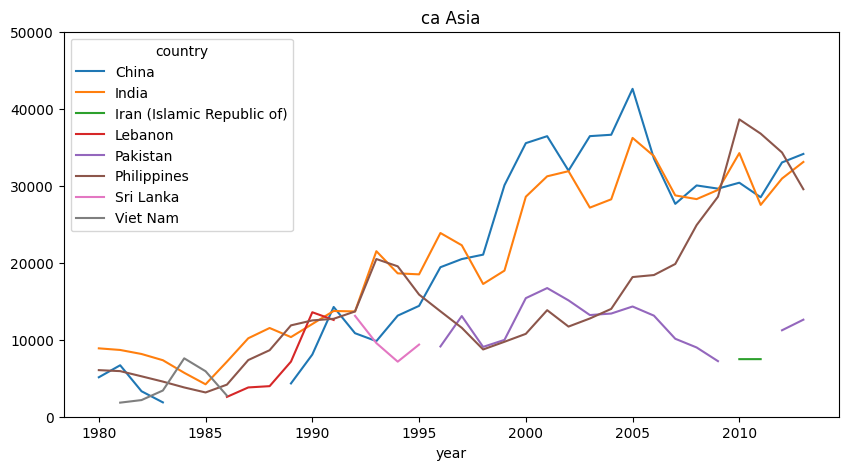

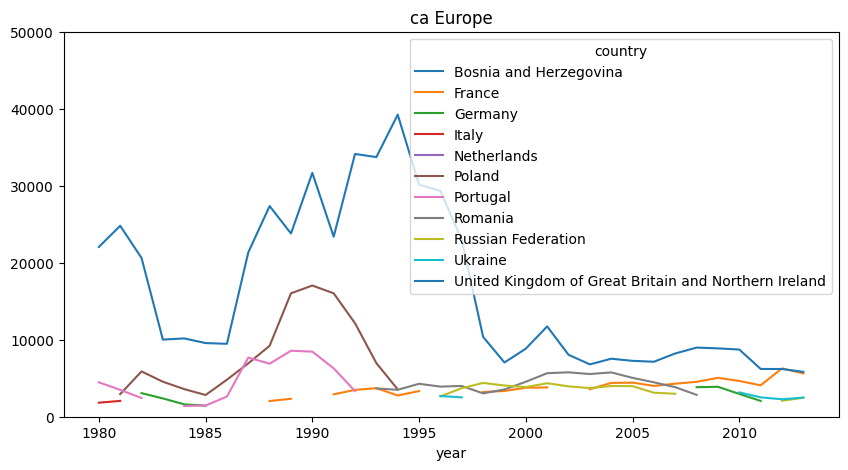

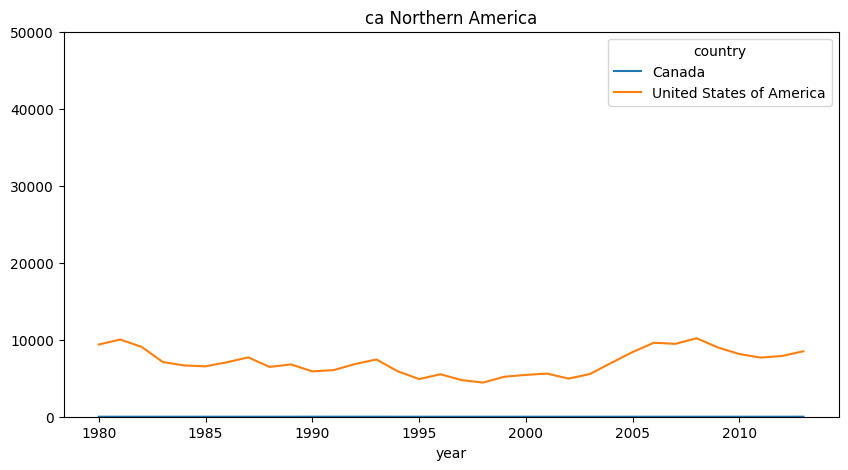

In [11]:
for df in [ca_mlt]:
    for cont in ['Asia', 'Europe', 'Northern America']:
        for var in ['country']:
            df_grp = df.loc[df.continent==cont].groupby(['year', var])['number'].sum() \
            .groupby(level=0, group_keys=False).nlargest(4).reset_index() \
            .pivot(index='year', columns=var, values='number')
            df_grp.plot(figsize=(10,5), title=df.name+' '+cont, ylim=(0, 50000))

### Australia

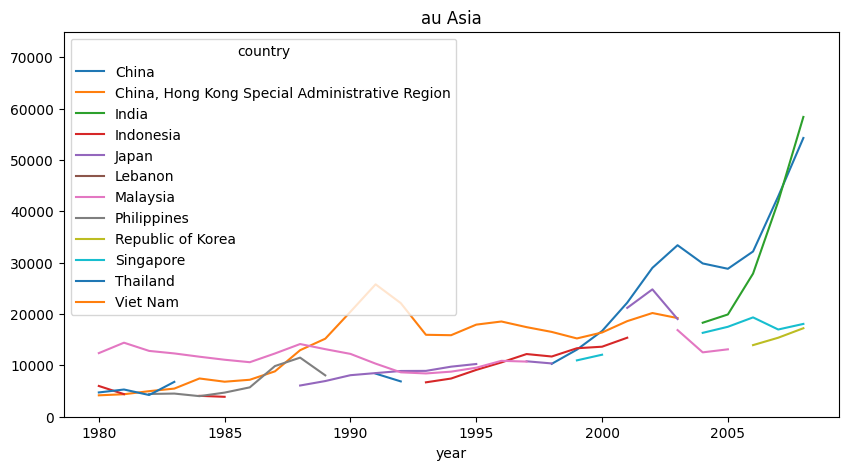

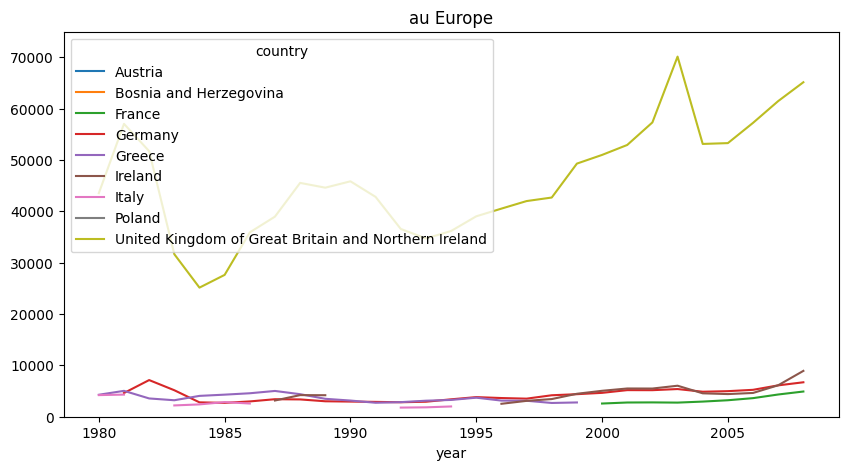

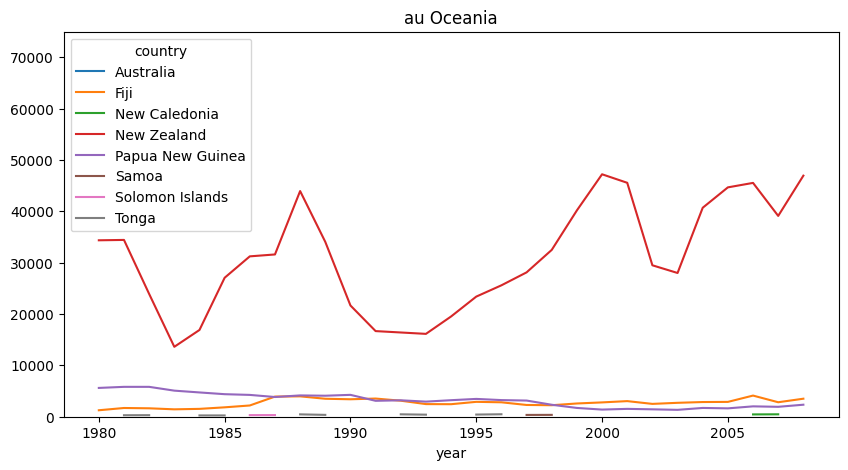

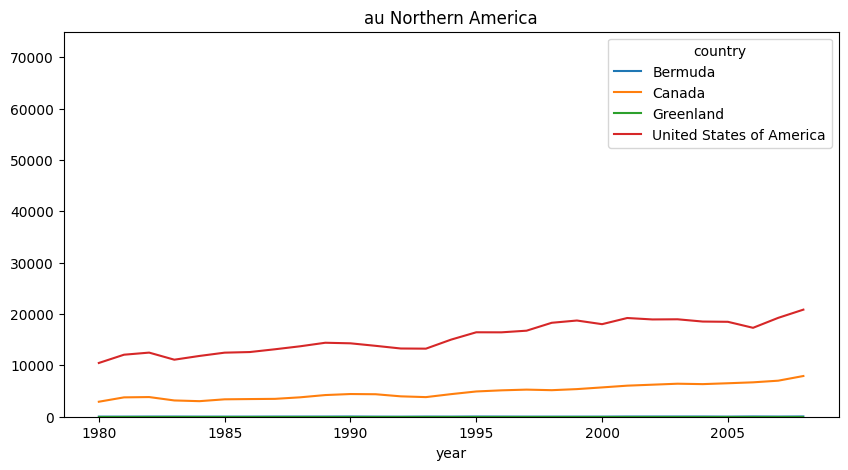

In [12]:
for df in [au_mlt]:
    for cont in ['Asia', 'Europe', 'Oceania', 'Northern America']:
        for var in ['country']:
            df_grp = df.loc[df.continent==cont].groupby(['year', var])['number'].sum() \
            .groupby(level=0, group_keys=False).nlargest(4).reset_index() \
            .pivot(index='year', columns=var, values='number')
            df_grp.plot(figsize=(10,5), title=df.name+' '+cont, ylim=(0, 75000))

1. Australia's immigration picture is more mixed. Immigration from Asia is coming from a selection of countries and it surged after 2003.

2. Immigration from Europe is dominated by one country, the UK, contributing 50,000 a year.

3. New Zealand is also contributing 40,000 a year.

4. What's interesting is that there are 20,000 Americans coming every year.

## Explore the top 10 countries of immigration for each destination.

### Canada

<Axes: xlabel='country'>

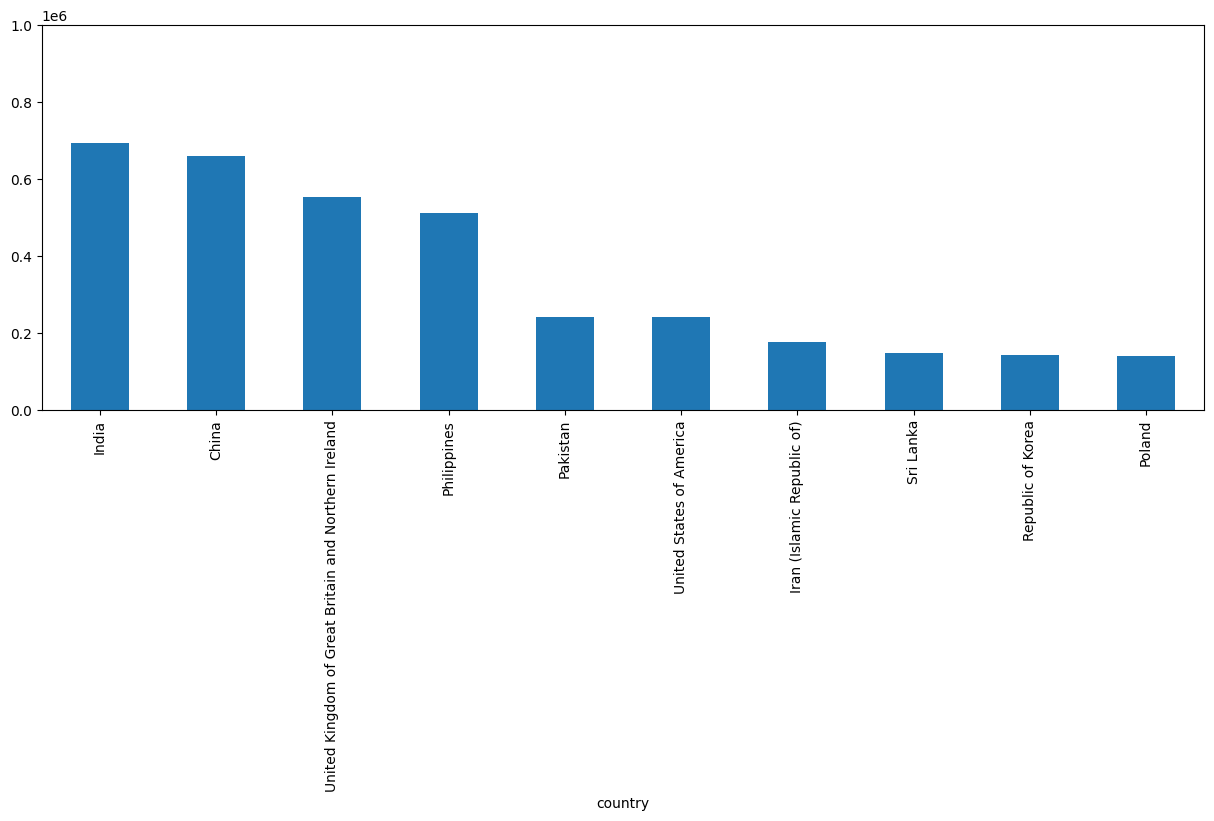

In [13]:
ca_mlt.groupby('country')['number'].sum().nlargest(10).plot(kind = 'bar', figsize = (15,5), ylim=(0,1000000))

### Australia

<Axes: xlabel='country'>

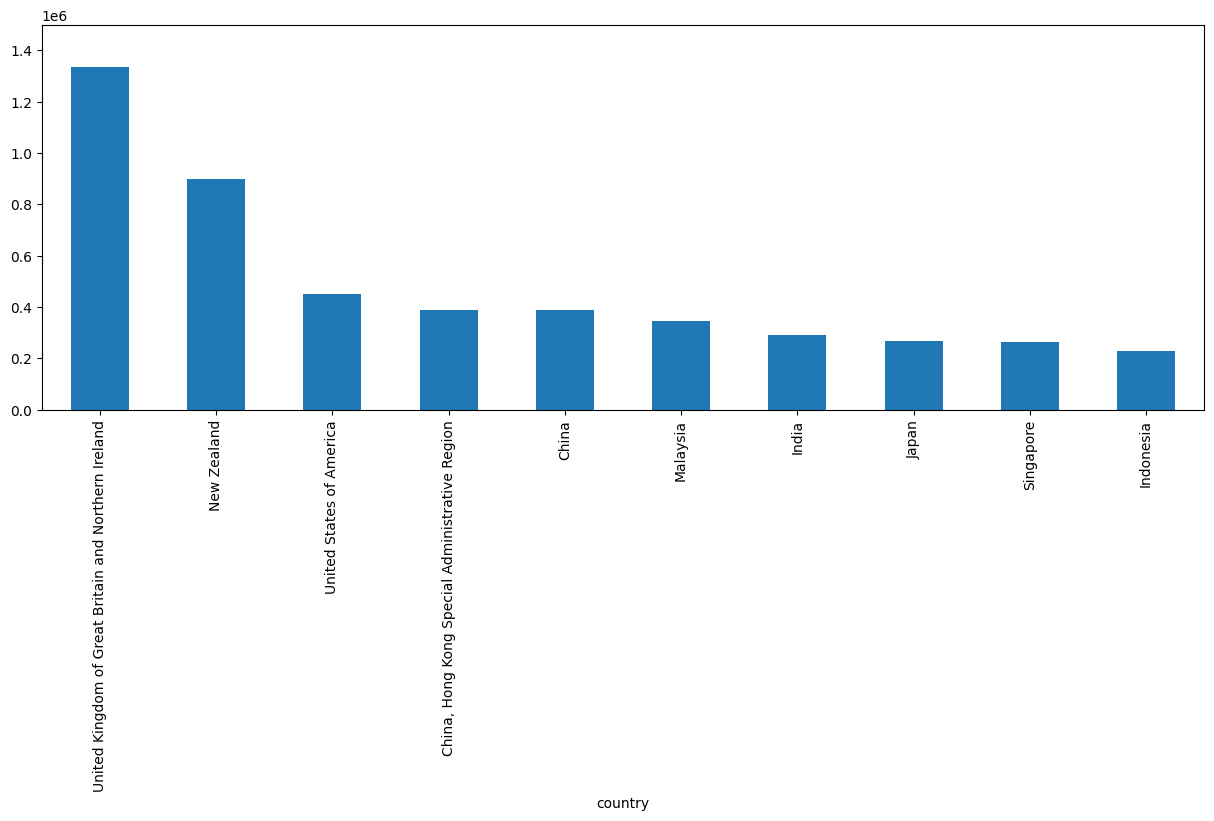

In [14]:
au_mlt.groupby('country')['number'].sum().nlargest(10).plot(kind = 'bar', figsize = (15,5), ylim=(0,1500000))

1. In Canada, immigration origins are concentrated in three countries: China, India, and the Philippines, with South Asia in general playing a significant role.

2. For Australia, the United Kingdom and New Zealand top the chart in immigration origins.

3. Geographic proximity also plays a role, as many immigrants to Australia originate from Asian countries.

4. China, including Hong Kong, emerges as a major contributor to immigration in both Canada and Australia.

In [15]:
immigration_string = f'Immigration to Canada: {round(ca_mlt.number.sum()/1000000, 1)} million from {ca_mlt.year.min()} to {ca_mlt.year.max()}'

avg_immigration_string = f'Avg Immigration to Canada every year: {round(ca_mlt.number.sum()/1000000/(ca_mlt.year.nunique()), 2)} million'

print(immigration_string)
print(avg_immigration_string)

Immigration to Canada: 6.4 million from 1980 to 2013
Avg Immigration to Canada every year: 0.19 million


In [16]:
immigration_string = f'Immigration to Australia: {round(au_mlt.number.sum()/1000000, 1)} million from {au_mlt.year.min()} to {au_mlt.year.max()}'

avg_immigration_string = f'Avg Immigration to Australia every year: {round(au_mlt.number.sum()/1000000/(au_mlt.year.nunique()), 2)} million'

print(immigration_string)
print(avg_immigration_string)

Immigration to Australia: 7.8 million from 1980 to 2008
Avg Immigration to Australia every year: 0.27 million
